# Divizija


In [1]:
from IPython import *
from IPython.display import *


In [2]:
import copy
import math
import numbers
import time


In [3]:
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D


In [4]:
import shapely as sh
import shapely.geometry as gm


In [5]:
%matplotlib inline


In [6]:
sym.init_printing()


In [7]:
df = pd.read_csv(
    'data/triangles/complete.tsv',
    sep = "\t",
    header = 0,
    index_col = None
)


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129448 entries, 0 to 1129447
Data columns (total 19 columns):
x_0           1129448 non-null float64
y_0           1129448 non-null float64
x_1           1129448 non-null float64
y_1           1129448 non-null float64
x_2           1129448 non-null float64
y_2           1129448 non-null float64
a             1129448 non-null float64
c             1129448 non-null float64
b             1129448 non-null float64
alpha         1129448 non-null float64
gamma         1129448 non-null float64
beta          1129448 non-null float64
sv_edge_0     1129448 non-null float64
sv_edge_1     1129448 non-null float64
sv_edge_2     1129448 non-null float64
sv_angle_0    1129448 non-null float64
sv_angle_1    1129448 non-null float64
sv_angle_2    1129448 non-null float64
l_0           1129448 non-null float64
dtypes: float64(19)
memory usage: 163.7 MB


In [9]:
(df.l_0.min(), df.l_0.max())


In [10]:
df.loc[np.abs(df.l_0 - df.l_0.min()) < 0.1]


,x_0,y_0,x_1,y_1,x_2,y_2,a,c,b,alpha,gamma,beta,sv_edge_0,sv_edge_1,sv_edge_2,sv_angle_0,sv_angle_1,sv_angle_2,l_0
1630,0.5,0.0,0.0000,0.865026,-0.5,0.0,1.0,0.999135,0.999135,2.094895,2.094895,2.093395,4.240193,0.001224,0.001224,8.885766,0.002122,0.002122,52.790165
1631,0.5,0.0,0.0000,0.865526,-0.5,0.0,1.0,0.999567,0.999567,2.094645,2.094645,2.093895,4.241417,0.000612,0.000612,8.885766,0.001061,0.001061,52.779327
1632,0.5,0.0,0.0000,0.866025,-0.5,0.0,1.0,1.000000,1.000000,2.094395,2.094395,2.094395,4.242641,0.000000,0.000000,8.885766,0.000000,0.000000,52.724820
3262,0.5,0.0,0.0005,0.864526,-0.5,0.0,1.0,0.998952,0.998452,2.095579,2.094712,2.092894,4.238970,0.001935,0.001935,8.885766,0.003356,0.003356,52.816303
3263,0.5,0.0,0.0005,0.865026,-0.5,0.0,1.0,0.999385,0.998884,2.095328,2.094462,2.093395,4.240193,0.001369,0.001369,8.885766,0.002372,0.002372,52.814851
3264,0.5,0.0,0.0005,0.865526,-0.5,0.0,1.0,0.999817,0.999317,2.095078,2.094212,2.093895,4.241417,0.000866,0.000866,8.885766,0.001500,0.001500,52.772876
4895,0.5,0.0,0.0010,0.865026,-0.5,0.0,1.0,0.999635,0.998635,2.095761,2.094028,2.093396,4.240194,0.001732,0.001732,8.885766,0.003000,0.003000,52.803360


In [11]:
df.loc[np.abs(df.l_0 - df.l_0.max()) < 100.0]


,x_0,y_0,x_1,y_1,x_2,y_2,a,c,b,alpha,gamma,beta,sv_edge_0,sv_edge_1,sv_edge_2,sv_angle_0,sv_angle_1,sv_angle_2,l_0
1128351,0.5,0.0,0.4925,0.050472,-0.5,0.0,1.0,0.993783,0.051027,3.090783,1.718313,1.474090,2.891797,1.337676,1.337676,8.885766,2.134717,2.134717,5737.629428
1128495,0.5,0.0,0.4930,0.050472,-0.5,0.0,1.0,0.994282,0.050955,3.090808,1.708607,1.483770,2.892402,1.338127,1.338127,8.885766,2.131573,2.131573,5745.374716
1128631,0.5,0.0,0.4935,0.050472,-0.5,0.0,1.0,0.994781,0.050889,3.090834,1.698875,1.493477,2.893015,1.338570,1.338570,8.885766,2.128682,2.128682,5753.146987
1128758,0.5,0.0,0.4940,0.050472,-0.5,0.0,1.0,0.995281,0.050828,3.090859,1.689118,1.503208,2.893634,1.339008,1.339008,8.885766,2.126047,2.126047,5760.946108
1128876,0.5,0.0,0.4945,0.050472,-0.5,0.0,1.0,0.995780,0.050771,3.090885,1.679339,1.512962,2.894260,1.339438,1.339438,8.885766,2.123672,2.123672,5768.771975
1128985,0.5,0.0,0.4950,0.050472,-0.5,0.0,1.0,0.996279,0.050719,3.090910,1.669538,1.522737,2.894893,1.339862,1.339862,8.885766,2.121560,2.121560,5776.624487
1129084,0.5,0.0,0.4955,0.050472,-0.5,0.0,1.0,0.996779,0.050673,3.090936,1.659719,1.532531,2.895533,1.340280,1.340280,8.885766,2.119713,2.119713,5784.503434
1129173,0.5,0.0,0.4960,0.050472,-0.5,0.0,1.0,0.997278,0.050631,3.090961,1.649882,1.542342,2.896180,1.340691,1.340691,8.885766,2.118134,2.118134,5792.408733
1129251,0.5,0.0,0.4965,0.050472,-0.5,0.0,1.0,0.997777,0.050594,3.090986,1.640030,1.552169,2.896834,1.341095,1.341095,8.885766,2.116826,2.116826,5800.340259
1129318,0.5,0.0,0.4970,0.050472,-0.5,0.0,1.0,0.998277,0.050561,3.091012,1.630165,1.562009,2.897495,1.341492,1.341492,8.885766,2.115790,2.115790,5808.297880


In [12]:
smp = pd.read_csv(
    'data/triangles/sample.tsv',
    sep = "\t",
    header = 0,
    index_col = None
)


In [13]:
smp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8165 entries, 0 to 8164
Data columns (total 19 columns):
x_0           8165 non-null float64
y_0           8165 non-null float64
x_1           8165 non-null float64
y_1           8165 non-null float64
x_2           8165 non-null float64
y_2           8165 non-null float64
a             8165 non-null float64
c             8165 non-null float64
b             8165 non-null float64
alpha         8165 non-null float64
gamma         8165 non-null float64
beta          8165 non-null float64
sv_edge_0     8165 non-null float64
sv_edge_1     8165 non-null float64
sv_edge_2     8165 non-null float64
sv_angle_0    8165 non-null float64
sv_angle_1    8165 non-null float64
sv_angle_2    8165 non-null float64
l_0           8165 non-null float64
dtypes: float64(19)
memory usage: 1.2 MB


In [14]:
m = int(df.x_1.unique().size)
n = int(df.y_1.unique().size)


In [15]:
(m, n)


In [16]:
x = np.load('data/triangles/x.npy')
y = np.load('data/triangles/y.npy')

X = np.load('data/triangles/X.npy')
Y = np.load('data/triangles/Y.npy')

l = np.load('data/triangles/l.npy')


In [17]:
(~np.isnan(l.ravel())).sum()


1129448

In [18]:
l_rav = smp.l_0.values.ravel().copy(order = 'F')
l_rav = l_rav[~np.isnan(l_rav)].copy(order = 'F')

lev = np.concatenate(
    (
        [l_rav.min()],
        [np.quantile(l_rav, float(i) / 100.0) for i in range(5, 96, 5)],
        [l_rav.max()]
    ))
try:
    del i
except (NameError, UnboundLocalError):
    pass
lev = np.array(
    lev,
    dtype = float,
    copy = True,
    order = 'F',
    subok = False,
    ndmin = 1
)

log10_lev = np.array(
    np.log10(lev),
    dtype = float,
    copy = True,
    order = 'F',
    subok = False,
    ndmin = 1
)

lev[0] -= 0.1
lev[-1] += 0.1
log10_lev[0] -= 0.1
log10_lev[-1] += 0.1

del l_rav


In [19]:
lev.size


In [20]:
lev


array([  52.62481994,   55.40577067,   58.47888156,   62.04009124,
         66.19153416,   70.99044517,   76.71878256,   83.47690537,
         91.74652409,  101.92187738,  114.65845014,  130.58722859,
        152.50870288,  181.99231558,  221.80159616,  282.26990353,
        380.15490044,  539.6026748 ,  856.55354327, 1699.17992924,
       5836.05762595])

(array([0.03972376, 0.57876393, 0.8167126 , 0.98623309, 1.0979152 ,
        1.15703809, 1.17952315, 1.16757449, 1.13090162, 1.07298588,
        1.01321538, 0.9120847 , 0.81886255, 0.74940713, 0.64761938,
        0.51699228, 0.45199686, 0.34920878, 0.24524569, 0.11081264]),
 array([1.62201511, 1.743555  , 1.76699906, 1.79267243, 1.82080245,
        1.8511999 , 1.8849017 , 1.92156634, 1.96258962, 2.00826741,
        2.05940607, 2.11590071, 2.18329463, 2.26005305, 2.34596467,
        2.45066457, 2.57996059, 2.73207409, 2.93275452, 3.23023937,
        3.86611213]),
 <a list of 20 Patch objects>)

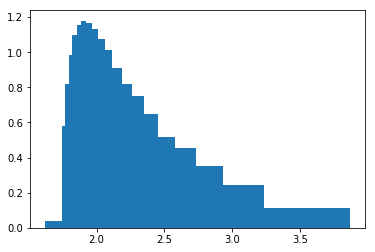

In [21]:
plt.hist(np.log10(l.ravel()), bins = log10_lev, density = True)


In [22]:
I = np.isnan(l)

#l[I] = 1.0e-16

X = np.ma.MaskedArray(X, mask = I)
Y = np.ma.MaskedArray(Y, mask = I)
l = np.ma.MaskedArray(l, mask = I)

del I


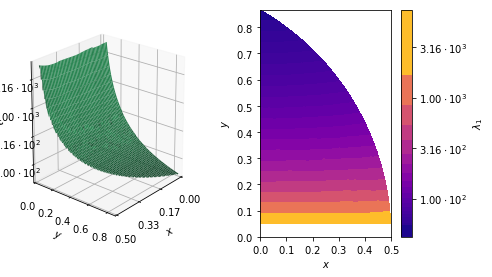

In [23]:
fig = plt.figure(num = 'Eigenvalues', figsize = (7.5, 4.171875))

ax0 = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122)

ax0.plot_surface(X, Y, np.log10(l.data), color = 'seagreen')
cs = ax1.contourf(X, Y, np.log10(l), levels = log10_lev, cmap = plt.cm.plasma)

ax0.set_xlim((0.0, 0.5))
ax0.set_ylim(
    (
        0.0,
        0.8660254037844386467637231707529361834714026269051903140279034897
    )
)
ax0.set_zlim((float(np.log10(lev[0])), float(np.log10(lev[-1]))))

ax1.set_xlim((0.0, 0.5))
ax1.set_ylim(
    (
        0.0,
        0.8660254037844386467637231707529361834714026269051903140279034897
    )
)

ax0.view_init(20.0, 40.0)

ax1.set_aspect('equal')

ax0.set_xlabel("$ x $")
ax0.set_ylabel("$ y $")
ax0.set_zlabel("$ \lambda_{1} $")

ax0.set_xticks(
    [
        0.0,
        0.1666666666666666666666666666666666666666666666666666666666666667,
        0.3333333333333333333333333333333333333333333333333333333333333333,
        0.5
    ]
)
ax0.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8])
ax0.set_zticks([2.0, 2.5, 3.0, 3.5])

ax0.set_xticklabels(
    [
        "$ 0.00 $",
        "$ 0.17 $",
        "$ 0.33 $",
        "$ 0.50 $"
    ]
)
ax0.set_yticklabels(
    [
        "$ 0.0 $",
        "$ 0.2 $",
        "$ 0.4 $",
        "$ 0.6 $",
        "$ 0.8 $"
    ]
)
ax0.set_zticklabels(
    [
        "$ 1.00 \cdot 10^{2} $",
        "$ 3.16 \cdot 10^{2} $",
        "$ 1.00 \cdot 10^{3} $",
        "$ 3.16 \cdot 10^{3} $"
    ]
)

ax1.set_xlabel("$ x $")
ax1.set_ylabel("$ y $")

ax1.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

ax1.set_xticklabels(
    [
        "$ 0.0 $",
        "$ 0.1 $",
        "$ 0.2 $",
        "$ 0.3 $",
        "$ 0.4 $",
        "$ 0.5 $"
    ]
)
ax1.set_yticklabels(
    [
        "$ 0.0 $",
        "$ 0.1 $",
        "$ 0.2 $",
        "$ 0.3 $",
        "$ 0.4 $",
        "$ 0.5 $",
        "$ 0.6 $",
        "$ 0.7 $",
        "$ 0.8 $"
    ]
)

cbar = fig.colorbar(
    cs,
    ax = ax1,
    ticks = [2.0, 2.5, 3.0, 3.5],
    spacing = 'proportional'
)

cbar.set_label("$ \lambda_{1} $")

cbar.ax.set_yticklabels(
    [
        "$ 1.00 \cdot 10^{2} $",
        "$ 3.16 \cdot 10^{2} $",
        "$ 1.00 \cdot 10^{3} $",
        "$ 3.16 \cdot 10^{3} $"
    ]
)

plt.show()


Formula je
$$ F \left( \lambda \right) = 172.64577327 \left( \lambda^{{- 1}} - 0.00892327 \right) \text{.} $$


In [24]:
def F (l):
    return 172.64577327 * (l ** -1 - 0.00892327)


In [25]:
df['n_l_0'] = F(df.l_0)
smp['n_l_0'] = F(smp.l_0)


In [26]:
n = sym.Symbol('n', integer = True, positive = True)


In [27]:
(10 * 4 * 3 * n).subs({n : 500})


In [28]:
N = 5000


In [29]:
df['edge'] = 0.34198712 * (df.sv_edge_0 - 3.26785903)
df['angle'] = 0.95656340 * (df.sv_edge_1 - 1.75722649)


In [30]:
nl0_eps = 1.0e-3
c_eps = 1.0e-1
ea_eps = 1.0e-1


In [31]:
def criterion (subdf):
    E = list()

    E.append(
        float(
            max(
                abs(subdf.n_l_0.mean()),
                abs(subdf.n_l_0.std(ddof = 1) - 1.0)
            )
        )
    )
    if E[-1] >= nl0_eps:
        return (False, tuple(E))

    E.append(
        float(
            max(
                subdf.x_1.min(),
                0.5 - subdf.x_1.max(),
                subdf.y_1.min() - 0.05,
                0.8660254037844386467637231707529361834714026269051903140279034897 -
                    subdf.y_1.max()
            )
        )
    )
    if E[-1] >= c_eps:
        return (False, tuple(E))

    E.append(
        float(
            max(
                abs(subdf.edge.mean()),
                abs(subdf.edge.std(ddof = 1) - 1.0),
                abs(subdf.angle.mean()),
                abs(subdf.angle.std(ddof = 1) - 1.0)
            )
        )
    )
    if E[-1] >= ea_eps:
        return (False, tuple(E))

    return (True, tuple(E))


In [ ]:
subdf = None
E_min = (float('inf'), float('inf'), float('inf'))

for i in range(1000):
    aux = df.loc[np.sort(np.random.choice(df.index, N, replace = False))]

    c, E = criterion(aux)

    if c:
        subdf = aux.copy(deep = True)
        min_E = E

        del c
        del E

        del aux

        break

    if E < E_min:
        subdf = aux.copy(deep = True)
        min_E = E

    del c
    del E

    del aux
try:
    del i
except (NameError, UnboundLocalError):
    pass
